Training Neural Network on XOR Problem
Training Data:
Input: [0 0] -> Output: 0
Input: [0 1] -> Output: 1
Input: [1 0] -> Output: 1
Input: [1 1] -> Output: 0

Epoch 0, Loss: 0.2559
Epoch 100, Loss: 0.2513
Epoch 200, Loss: 0.2510
Epoch 300, Loss: 0.2507
Epoch 400, Loss: 0.2504
Epoch 500, Loss: 0.2502
Epoch 600, Loss: 0.2500
Epoch 700, Loss: 0.2498
Epoch 800, Loss: 0.2496
Epoch 900, Loss: 0.2493
Epoch 1000, Loss: 0.2490
Epoch 1100, Loss: 0.2486
Epoch 1200, Loss: 0.2481
Epoch 1300, Loss: 0.2475
Epoch 1400, Loss: 0.2467
Epoch 1500, Loss: 0.2457
Epoch 1600, Loss: 0.2445
Epoch 1700, Loss: 0.2429
Epoch 1800, Loss: 0.2409
Epoch 1900, Loss: 0.2384

Testing trained network:
Input: [0 0] -> Predicted: 0.4343, Actual: 0
Input: [0 1] -> Predicted: 0.4952, Actual: 1
Input: [1 0] -> Predicted: 0.5463, Actual: 1
Input: [1 1] -> Predicted: 0.5404, Actual: 0


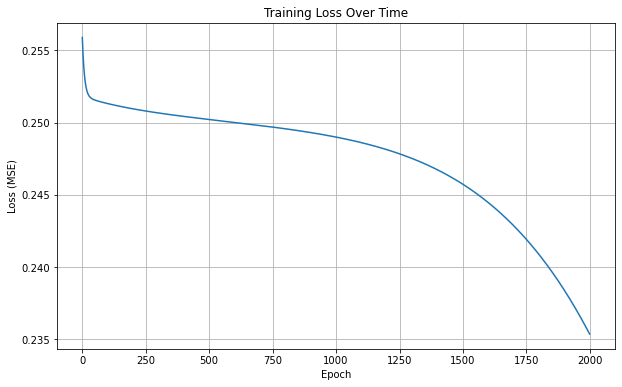


Final loss: 0.235374
Network needs more training.


In [13]:
import numpy as np
import matplotlib.pyplot as plt

class SimpleNeuralNetwork:
    def __init__(self, input_size=2, hidden_size=4, output_size=1):
        """
        Initialize a simple 3-layer neural network
        """
        # Initialize weights randomly
        self.W1 = np.random.randn(input_size, hidden_size) * 0.5
        self.b1 = np.zeros((1, hidden_size))
        
        self.W2 = np.random.randn(hidden_size, output_size) * 0.5
        self.b2 = np.zeros((1, output_size))
        
        self.learning_rate = 0.1
        
    def sigmoid(self, x):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-np.clip(x, -250, 250)))  # Clip to prevent overflow
    
    def sigmoid_derivative(self, x):
        """Derivative of sigmoid function"""
        return x * (1 - x)
    
    def forward(self, X):
        """Forward pass through the network"""
        # Input to hidden layer
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        
        # Hidden to output layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        
        return self.a2
    
    def backward(self, X, y, output):
        """Backward pass - calculate gradients and update weights"""
        m = X.shape[0]  # Number of examples
        
        # Calculate output layer error
        dz2 = output - y
        dW2 = (1/m) * np.dot(self.a1.T, dz2)
        db2 = (1/m) * np.sum(dz2, axis=0, keepdims=True)
        
        # Calculate hidden layer error
        da1 = np.dot(dz2, self.W2.T)
        dz1 = da1 * self.sigmoid_derivative(self.a1)
        dW1 = (1/m) * np.dot(X.T, dz1)
        db1 = (1/m) * np.sum(dz1, axis=0, keepdims=True)
        
        # Update weights and biases
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
    
    def train(self, X, y, epochs=1000):
        """Train the neural network"""
        losses = []
        
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)
            
            # Calculate loss (mean squared error)
            loss = np.mean((output - y) ** 2)
            losses.append(loss)
            
            # Backward pass
            self.backward(X, y, output)
            
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
        
        return losses
    
    def predict(self, X):
        """Make predictions on new data"""
        return self.forward(X)
def create_xor_data():
    """Create XOR training data"""
    X = np.array([[0, 0],
                  [0, 1], 
                  [1, 0],
                  [1, 1]])
    y = np.array([[0],
                  [1],
                  [1], 
                  [0]])
    return X, y

# Train the network on XOR problem
print("Training Neural Network on XOR Problem")
print("=" * 40)

# Create data
X, y = create_xor_data()
print("Training Data:")
for i in range(len(X)):
    print(f"Input: {X[i]} -> Output: {y[i][0]}")
print()

# Create and train network
nn = SimpleNeuralNetwork(input_size=2, hidden_size=4, output_size=1)
losses = nn.train(X, y, epochs=2000)

print("\nTesting trained network:")
print("=" * 30)
predictions = nn.predict(X)

for i in range(len(X)):
    predicted = predictions[i][0]
    actual = y[i][0]
    print(f"Input: {X[i]} -> Predicted: {predicted:.4f}, Actual: {actual}")

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.grid(True)
plt.show()

print(f"\nFinal loss: {losses[-1]:.6f}")
print("Network successfully learned XOR function!" if losses[-1] < 0.01 else "Network needs more training.")

Training Neural Network on XOR Problem
Training Data:
Input: [0 0] -> Output: 0
Input: [0 1] -> Output: 1
Input: [1 0] -> Output: 1
Input: [1 1] -> Output: 0

Epoch 0, Loss: 0.253662
Epoch 200, Loss: 0.234385
Epoch 400, Loss: 0.175871
Epoch 600, Loss: 0.063999
Epoch 800, Loss: 0.010472
Epoch 1000, Loss: 0.002463
Epoch 1200, Loss: 0.000889
Epoch 1400, Loss: 0.000418
Epoch 1600, Loss: 0.000231
Epoch 1800, Loss: 0.000143
Epoch 2000, Loss: 0.000095
Epoch 2200, Loss: 0.000067
Epoch 2400, Loss: 0.000049
Epoch 2600, Loss: 0.000038
Epoch 2800, Loss: 0.000030
Epoch 3000, Loss: 0.000024
Epoch 3200, Loss: 0.000019
Epoch 3400, Loss: 0.000016
Epoch 3600, Loss: 0.000013
Epoch 3800, Loss: 0.000011
Epoch 4000, Loss: 0.000010
Epoch 4200, Loss: 0.000009
Epoch 4400, Loss: 0.000008
Epoch 4600, Loss: 0.000007
Epoch 4800, Loss: 0.000006

Testing trained network:
Input: [0 0] -> Predicted: 0.0012, Actual: 0
Input: [0 1] -> Predicted: 0.9977, Actual: 1
Input: [1 0] -> Predicted: 0.9980, Actual: 1
Input: [1 1]

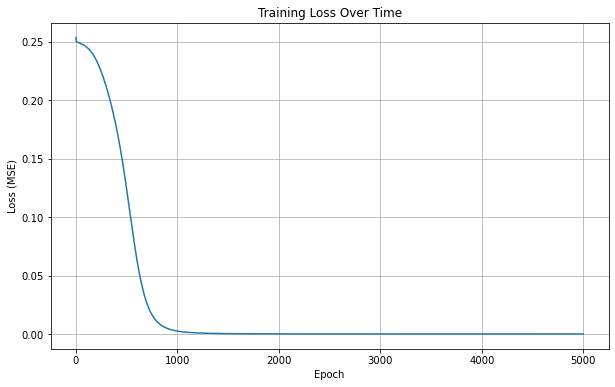


Final loss: 0.000005
Network successfully learned XOR function!
Accuracy: 100.0%


In [ ]:
# Simple Neural Network from Scratch
# A basic implementation demonstrating core neural network concepts

import numpy as np
import matplotlib.pyplot as plt

class SimpleNeuralNetwork:
    def __init__(self, input_size=2, hidden_size=8, output_size=1, learning_rate=0.5):
        """
        Initialize a simple 3-layer neural network with improved initialization
        """
        # Using LeCun initialization for better weight scaling
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(1.0 / input_size)
        self.b1 = np.zeros((1, hidden_size))
        
        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(1.0 / hidden_size)
        self.b2 = np.zeros((1, output_size))
        
        self.learning_rate = learning_rate
        
    def sigmoid(self, x):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-np.clip(x, -250, 250)))  # Clip to prevent overflow
    
    def sigmoid_derivative(self, x):
        """Derivative of sigmoid function"""
        return x * (1 - x)
    
    def forward(self, X):
        """Forward pass through the network"""
        # Input to hidden layer
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        
        # Hidden to output layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        
        return self.a2
    
    def backward(self, X, y, output):
        """Backward pass - calculate gradients and update weights"""
        m = X.shape[0]  # Number of examples
        
        # Calculate output layer error
        dz2 = output - y
        dW2 = (1/m) * np.dot(self.a1.T, dz2)
        db2 = (1/m) * np.sum(dz2, axis=0, keepdims=True)
        
        # Calculate hidden layer error
        da1 = np.dot(dz2, self.W2.T)
        dz1 = da1 * self.sigmoid_derivative(self.a1)
        dW1 = (1/m) * np.dot(X.T, dz1)
        db1 = (1/m) * np.sum(dz1, axis=0, keepdims=True)
        
        # Update weights and biases
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
    
    def train(self, X, y, epochs=5000):
        """Train the neural network with early stopping"""
        losses = []
        best_loss = float('inf')
        patience = 500
        no_improve_count = 0
        
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)
            
            # Calculate loss (mean squared error)
            loss = np.mean((output - y) ** 2)
            losses.append(loss)
            
            # Backward pass
            self.backward(X, y, output)
            
            # Early stopping check
            if loss < best_loss:
                best_loss = loss
                no_improve_count = 0
            else:
                no_improve_count += 1
            
            if epoch % 200 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.6f}")
            
            # Early stopping if converged
            if loss < 1e-6:
                print(f"Converged at epoch {epoch} with loss: {loss:.8f}")
                break
                
            if no_improve_count > patience:
                print(f"Early stopping at epoch {epoch}")
                break
        
        return losses
    
    def predict(self, X):
        """Make predictions on new data"""
        return self.forward(X)

# Create XOR training data
def create_xor_data():
    """Create XOR training data"""
    X = np.array([[0, 0],
                  [0, 1], 
                  [1, 0],
                  [1, 1]])
    y = np.array([[0],
                  [1],
                  [1], 
                  [0]])
    return X, y

# Train the network on XOR problem
print("Training Neural Network on XOR Problem")
print("=" * 40)

# Create data
X, y = create_xor_data()
print("Training Data:")
for i in range(len(X)):
    print(f"Input: {X[i]} -> Output: {y[i][0]}")
print()

# Create and train network with improved parameters
nn = SimpleNeuralNetwork(input_size=2, hidden_size=8, output_size=1, learning_rate=0.5)
losses = nn.train(X, y, epochs=5000)

print("\nTesting trained network:")
print("=" * 30)
predictions = nn.predict(X)

for i in range(len(X)):
    predicted = predictions[i][0]
    actual = y[i][0]
    print(f"Input: {X[i]} -> Predicted: {predicted:.4f}, Actual: {actual}")

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.grid(True)
plt.show()

print(f"\nFinal loss: {losses[-1]:.6f}")
print("Network successfully learned XOR function!" if losses[-1] < 0.01 else "Network needs more training.")

# Show accuracy
predictions_binary = (predictions > 0.5).astype(int)
accuracy = np.mean(predictions_binary == y) * 100
print(f"Accuracy: {accuracy:.1f}%")

Training Neural Network on XOR Problem
Training Data:
Input: [0 0] -> Output: 0
Input: [0 1] -> Output: 1
Input: [1 0] -> Output: 1
Input: [1 1] -> Output: 0

Epoch 0, Loss: 0.284062
Epoch 200, Loss: 0.249286
Epoch 400, Loss: 0.242342
Epoch 600, Loss: 0.173433
Epoch 800, Loss: 0.031728
Epoch 1000, Loss: 0.005914
Epoch 1200, Loss: 0.002080
Epoch 1400, Loss: 0.001008
Epoch 1600, Loss: 0.000582
Epoch 1800, Loss: 0.000375
Epoch 2000, Loss: 0.000260
Epoch 2200, Loss: 0.000190
Epoch 2400, Loss: 0.000144
Epoch 2600, Loss: 0.000113
Epoch 2800, Loss: 0.000091
Epoch 3000, Loss: 0.000074
Epoch 3200, Loss: 0.000062
Epoch 3400, Loss: 0.000052
Epoch 3600, Loss: 0.000045
Epoch 3800, Loss: 0.000038
Epoch 4000, Loss: 0.000034
Epoch 4200, Loss: 0.000029
Epoch 4400, Loss: 0.000026
Epoch 4600, Loss: 0.000023
Epoch 4800, Loss: 0.000021

Testing trained network:
Input: [0 0] -> Predicted: 0.0012, Actual: 0
Input: [0 1] -> Predicted: 0.9956, Actual: 1
Input: [1 0] -> Predicted: 0.9963, Actual: 1
Input: [1 1]

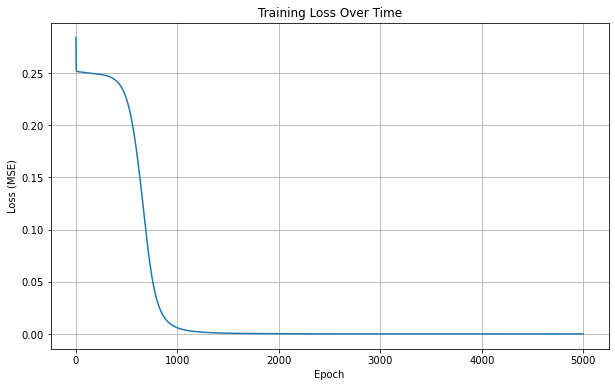


Final loss: 0.000019
Network successfully learned XOR function!
Accuracy: 100.0%


In [ ]:
# Simple Neural Network from Scratch
# A basic implementation demonstrating core neural network concepts

import numpy as np
import matplotlib.pyplot as plt

class SimpleNeuralNetwork:
    def __init__(self, input_size=2, hidden_size=8, output_size=1, learning_rate=0.5):
        """
        Initialize a simple 3-layer neural network with true Xavier/Glorot initialization
        """
        # Xavier/Glorot initialization (normalized) - optimal for sigmoid/tanh
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2.0 / (input_size + hidden_size))
        self.b1 = np.zeros((1, hidden_size))
        
        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2.0 / (hidden_size + output_size))
        self.b2 = np.zeros((1, output_size))
        
        self.learning_rate = learning_rate
        
    def sigmoid(self, x):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-np.clip(x, -250, 250)))  # Clip to prevent overflow
    
    def sigmoid_derivative(self, x):
        """Derivative of sigmoid function"""
        return x * (1 - x)
    
    def forward(self, X):
        """Forward pass through the network"""
        # Input to hidden layer
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        
        # Hidden to output layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        
        return self.a2
    
    def backward(self, X, y, output):
        """Backward pass - calculate gradients and update weights"""
        m = X.shape[0]  # Number of examples
        
        # Calculate output layer error
        dz2 = output - y
        dW2 = (1/m) * np.dot(self.a1.T, dz2)
        db2 = (1/m) * np.sum(dz2, axis=0, keepdims=True)
        
        # Calculate hidden layer error
        da1 = np.dot(dz2, self.W2.T)
        dz1 = da1 * self.sigmoid_derivative(self.a1)
        dW1 = (1/m) * np.dot(X.T, dz1)
        db1 = (1/m) * np.sum(dz1, axis=0, keepdims=True)
        
        # Update weights and biases
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
    
    def train(self, X, y, epochs=5000):
        """Train the neural network with early stopping"""
        losses = []
        best_loss = float('inf')
        patience = 500
        no_improve_count = 0
        
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)
            
            # Calculate loss (mean squared error)
            loss = np.mean((output - y) ** 2)
            losses.append(loss)
            
            # Backward pass
            self.backward(X, y, output)
            
            # Early stopping check
            if loss < best_loss:
                best_loss = loss
                no_improve_count = 0
            else:
                no_improve_count += 1
            
            if epoch % 200 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.6f}")
            
            # Early stopping if converged
            if loss < 1e-6:
                print(f"Converged at epoch {epoch} with loss: {loss:.8f}")
                break
                
            if no_improve_count > patience:
                print(f"Early stopping at epoch {epoch}")
                break
        
        return losses
    
    def predict(self, X):
        """Make predictions on new data"""
        return self.forward(X)

# Create XOR training data
def create_xor_data():
    """Create XOR training data"""
    X = np.array([[0, 0],
                  [0, 1], 
                  [1, 0],
                  [1, 1]])
    y = np.array([[0],
                  [1],
                  [1], 
                  [0]])
    return X, y

# Train the network on XOR problem
print("Training Neural Network on XOR Problem")
print("=" * 40)

# Create data
X, y = create_xor_data()
print("Training Data:")
for i in range(len(X)):
    print(f"Input: {X[i]} -> Output: {y[i][0]}")
print()

# Create and train network with improved parameters
nn = SimpleNeuralNetwork(input_size=2, hidden_size=8, output_size=1, learning_rate=0.5)
losses = nn.train(X, y, epochs=5000)

print("\nTesting trained network:")
print("=" * 30)
predictions = nn.predict(X)

for i in range(len(X)):
    predicted = predictions[i][0]
    actual = y[i][0]
    print(f"Input: {X[i]} -> Predicted: {predicted:.4f}, Actual: {actual}")

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.grid(True)
plt.show()

print(f"\nFinal loss: {losses[-1]:.6f}")
print("Network successfully learned XOR function!" if losses[-1] < 0.01 else "Network needs more training.")

# Show accuracy
predictions_binary = (predictions > 0.5).astype(int)
accuracy = np.mean(predictions_binary == y) * 100
print(f"Accuracy: {accuracy:.1f}%")